In [3]:
from SelfOrganizingMap import somClass
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_mldata
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline

#plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Testing on a toy set of RGB vectors

In [ ]:
raw_data1 = np.random.randint(0, 255, (5000,3))
raw_data1 = raw_data1.astype(np.float32)
som1 = somClass(3, result =True, seed = 10)

# Scaling
data1 = raw_data1
sc1 = MinMaxScaler()
data1 = sc1.fit_transform(data1)

In [5]:
# Training
qq1 = som1.train(data1)

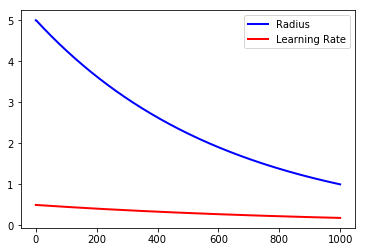

In [10]:
# Visiuializing the decay of radius and learning rate with each iteration
plt.plot(range(len(som1.all_radius)), som1.all_radius, 'b',lw = 2, label = 'Radius')
plt.plot(range(len(som1.all_lr)), som1.all_lr, 'r',lw = 2, label = 'Learning Rate')
plt.legend()

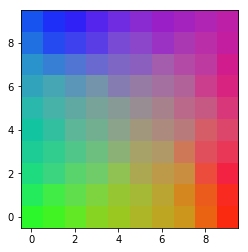

In [12]:
# Visualizing the SOM
# similar colors should blend in and be close to each other
plt.imshow(qq1, origin = 'lower')

# Testing on MNIST dataset with Euclidean distance metric

In [13]:
# Getting data
mnist = fetch_mldata('MNIST original')
mnist.data.shape

(70000, 784)

In [14]:
# Getting a smaller sample (700 samples of each of the 10 classes)
X = mnist.data
y = mnist.target
y = y.astype(np.int)
data_sub = {}
label_sub = {}
X_sub = np.zeros((1,784))
y_sub = np.zeros((1,))
for ii in range(10):
    all_indices = [i for i, j in enumerate(list(y)) if j == ii]
    rand_index = random.sample(all_indices,700)
    data_sub[ii] = X[rand_index,:]
    label_sub[ii] = y[rand_index]
    X_sub = np.concatenate((X_sub,data_sub[ii]), axis = 0)
    y_sub = np.concatenate((y_sub,label_sub[ii]), axis = 0)

X_sub = X_sub[1:,:]
y_sub = y_sub[1:]

# Shuffling the input samples
shuffle_index = np.random.permutation(X_sub.shape[0])
X_shuffled = X_sub[shuffle_index,:]
y_shuffled = y_sub[shuffle_index]
X_shuffled.shape, y_shuffled.shape

((7000, 784), (7000,))

In [15]:
raw_data2 = X_shuffled
raw_data2 = raw_data2.astype(np.float32)
som2 = somClass(784, num_iterations = 50000, init_lr = 0.1, grid_dims = (25,25), result = True, seed = 10,\
               distance_metric = 0)

# Scaling
data2 = raw_data2
sc2 = MinMaxScaler()
data2 = sc2.fit_transform(data2)

In [17]:
# Training
qq2 = som2.train(data2)

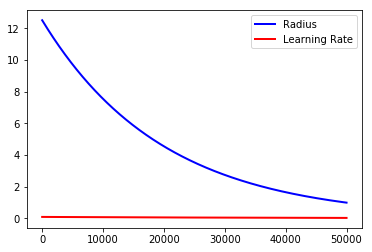

In [19]:
# Visiuializing the decay of radius and learning rate with each iteration
plt.plot(range(len(som2.all_radius)), som2.all_radius, 'b',lw = 2, label = 'Radius')
plt.plot(range(len(som2.all_lr)), som2.all_lr, 'r',lw = 2, label = 'Learning Rate')
plt.legend()

In [21]:
# Getting the data samples and which bmu they were mapped to
bb = som2.bmu_mappings()

In [23]:
# function to from an array with 3 columns : First two columns are grid positions of every SOM node and third is the class
# label which will be used to color the points

def bigMatrix(bb):
    sz = 0
    for key, value in bb.items():
        sz+= len(value)
    BigM = np.zeros((sz,3))   
    
    # to add a little bit of jitter so that points mapped to the same SOM node are more visible
    a_x = -0.4
    a_y = -0.4
    b_x = 0.4
    b_y = 0.4

    counter = 0
    for key, value in bb.items():
        x1 = key[0] 
        x2 = key[1] 
        #val_unique = set(value)
        for index in value:
            BigM[counter,0] = x1 + (b_x-a_x)*np.random.rand() + a_x
            BigM[counter,1] = x2 + (b_y-a_y)*np.random.rand() + a_y
            BigM[counter,2] = int(y_shuffled[index])
            counter += 1
    
    return BigM

In [25]:
# Converting the big matrix to a dataframe and visualizing a subset of rows
BigM = bigMatrix(bb)
df  = pd.DataFrame(BigM, columns = ['XCoord', 'YCoord', 'Class'])
df.head()

,XCoord,YCoord,Class
0,5.336290,20.740035,0.0
1,5.232252,21.027071,2.0
2,5.029816,20.760193,9.0
3,5.163804,20.697531,7.0
4,4.857513,20.759513,4.0


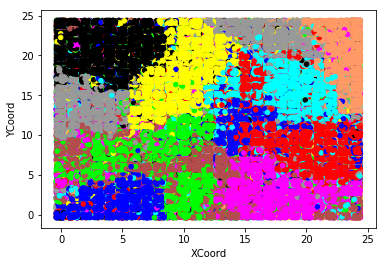

In [27]:
# Visualizing the SOM
# Array of 10 rgb values for the 10 classes
class_colors = np.array([[0, 0, 0],
                 [1, 0.6, 0.4],
                 [0.6, 0.6, 0.6],
                 [1, 0, 0],
                 [0, 1, 0],
                 [0, 0, 1],
                 [1, 1, 0],
                 [1, 0, 1],
                 [0, 1, 1],
                 [0.7, 0.3, 0.3]])
df.plot(kind='scatter', x = 'XCoord', y = 'YCoord', c=df['Class'].apply(lambda x: class_colors[int(x),:]))
plt.show()

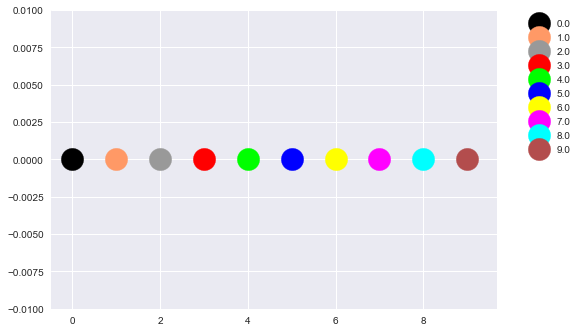

In [44]:
class_colors_dict = {0.0: [0, 0, 0], 1.0:[1, 0.6, 0.4], 2.0: [0.6, 0.6, 0.6], 3.0 : [1, 0, 0], 4.0 : [0, 1, 0],
                 5.0: [0, 0, 1],
                 6.0: [1, 1, 0],
                 7.0: [1, 0, 1],
                 8.0: [0, 1, 1],
                 9.0: [0.7, 0.3, 0.3]}

for key, value in class_colors_dict.items():
    x = key
    y = 0.0
    plt.scatter(x,y, color=value, s = 500, label = key)
    
plt.ylim([-0.01, 0.01])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [45]:
# Similar shaped letters in the MNIST database such as 3 (red) and 8(cyan), 4(green) and 9(brown) are in nearby or adjacent 
# clusters